# Case 3. Patient Drug Review
**Neural Networks for Machine Learning Applications**<br>
12.03.2023<br>
Erik Holopainen, Alejandro Rosales Rodriguez and Brian van den Berg<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

Instructions: Write here why this Notebook was created, what were the main objectives.

## 2. Setup

Instructions: Write here shortly what libraries were used and why.

In [14]:
# Machine Learning and Data Science
import pandas as pd
import numpy as np
import nltk

# Modeling neural networks
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils import pad_sequences

# Sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt

# General imports
import sys
import os

# Print the library versions
print('\033[1m' + 'Notebook Version Register:' + '\033[0m')
print(f'[Python {sys.version}]')
print(f'[{tf.__name__} {tf.__version__}]')
print(f'[{pd.__name__} {pd.__version__}]')
print(f'[{np.__name__} {np.__version__}]')
print(f'[{nltk.__name__} {nltk.__version__}]')
print(f'[{sklearn.__name__} {sklearn.__version__}]')
print(f'[{matplotlib.__name__} {matplotlib.__version__}]')

Notebook Version Register:
[Python 3.10.6 (main, Oct  7 2022, 15:17:23) [Clang 12.0.0 ]]
[tensorflow 2.9.1]
[pandas 1.4.4]
[numpy 1.22.3]
[nltk 3.8.1]
[sklearn 1.1.2]
[matplotlib 3.5.2]


In [2]:
# Fetch the nltk datasets
# nltk.download('popular') # You only need to download it once

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/alerr415/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/alerr415/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/alerr415/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/alerr415/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/alerr415/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/alerr415/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downlo

True

## 3. Dataset

Instructions: Describe here brielfy the data and its main characteristics. Remember document the code.  

In [3]:
# Define the input variables
inputDir = 'input'
inputPaths = []

# Get the .csv files in the input folder
for file in os.listdir(inputDir):
    if file.endswith('.csv'):
        inputPaths.append(os.path.join(inputDir, file))

# Print the input paths
print(inputPaths)

# Define the dataframe
df = pd.DataFrame()

# Append all the input files
for path in inputPaths:
    df = pd.concat([df, pd.read_csv(path)], ignore_index=True)

# Drop the unique id column
df = df.drop(['uniqueID'], axis=1)

# Shuffle the dataframe
df = df.sample(frac=1)
df = df.reset_index(drop=True)

# Display the dataframe
display(df)

# Display the dataframe description
print("Description of the dataframe:")
display(df.describe().T)

['input/drugsComTrain_raw.csv', 'input/drugsComTest_raw.csv']


,drugName,condition,review,rating,date,usefulCount
0,Ethinyl estradiol / norgestimate,Birth Control,"""I was only on this medication for a month bec...",2,10-Feb-16,1
1,Augmentin,Strep Throat,"""So, got another strep infection. Haven&#039;t...",10,16-Apr-16,38
2,Citric acid / magnesium oxide / sodium picosul...,Bowel Preparation,"""I took it as instructed, drank even more wate...",1,11-Nov-17,0
3,Avelox,Sinusitis,"""I was put on Avelox after Augmentum didn&#039...",10,21-Oct-09,19
4,Lorcaserin,Obesity,"""I have been on Belviq for 1 week and 1 day. ...",7,21-Aug-15,42
...,...,...,...,...,...,...
215058,Tizanidine,Muscle Spasm,"""I experience a severe frontal headache everyt...",5,27-Mar-17,4
215059,Baclofen,Alcohol Withdrawal,"""The guy who posted earlier said it well. I u...",9,19-Jan-17,11
215060,Mirtazapine,Anxiety,"""This drug did help me sleep, but it did not p...",1,18-May-17,19
215061,Sertraline,Anxiety and Stress,"""Out of nowhere I got extremely depressed and ...",10,14-Apr-16,127


Description of the dataframe:


,count,mean,std,min,25%,50%,75%,max
rating,215063.0,6.990008,3.275554,1.0,5.0,8.0,10.0,10.0
usefulCount,215063.0,28.001004,36.346069,0.0,6.0,16.0,36.0,1291.0


## 4. Preprocessing

Instructions: Describe:

- how the missing values are handled
- conversion of textual and categorical data into numerical values (if needed)
- how the data is splitted into train, validation and test sets
- the features (=input) and labels (=output), and 
- how the features are normalized or scaled

### Splitting into Datasets

In [4]:
# Get the reviews
X = list(df['review'])
y = list(df['rating'])

# Split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

### Text Lemmatization

In [5]:
# Define the nltk variables
en_stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

# Function to preprocess text
def prepare_sentence(text):
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    # process all tokens aslong as they're alpha-numeric (text)
    result = []
    for token in text:
        if token not in en_stopwords and token.isalnum():
            token = lemmatizer.lemmatize(token)
            result.append(token)

    # Join the seperate strings back into a single string
    if len(result) > 0:
        text = result.pop(0)
        for word in result:
            text += ' ' + word
    else:
        text = ''

    return text

# lemmatize the training data
print('Example of lemmatization:')
print(X_train[0])
for i in range(len(X_train)):
    X_train[i] = prepare_sentence(X_train[i])
print(X_train[0])

Example of lemmatization:
"I&#039;ve had Skyla for 8 days now. I didn&#039;t take any painkillers, and I&#039;d say my insertion was the most bizarre pain I&#039;ve ever felt. However, I think I have a pretty high pain tolerance in general, so I was able to suck it up with only a few squeaks of discomfort.
The first day, my cramps were moderately painful. The next day, I felt great. The rest of the week, I would have a cramp or two, but they were light and subsided pretty quickly. I spotted on the first day and a few other non-consecutive days thoughout the week. Nothing too terrible.
I got my IUD inserted before my period was due, but since insertion, I haven&#039;t gotten it. It&#039;s 4 days late, but Skyla makes periods irregular, so I&#039;ll just have to wait to find out when it gets here!"
039 skyla 8 day 039 take painkiller 039 say insertion bizarre pain 039 ever felt however think pretty high pain tolerance general able suck squeak discomfort first day cramp moderately painful

### Tokenization

In [6]:
# Maximum amount of words for the model to process (based on frequency)
unique_words = set()
for review in X_train:
    unique_words.update(set(word for word in review.strip().split()))
num_words = len(unique_words)
print(f'Number of different unique words in tokenizer: {num_words}')

# Create a tokenizer to convert text to sequences
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

# Tokenize the reviews
X_train = tokenizer.texts_to_sequences(X_train)

Number of different unique words in tokenizer: 42706


### Padding

In [7]:
# Get the biggest sequence in the data
maxlen = 0
for seq in X_train:
    if len(seq) > maxlen:
        maxlen = len(seq)
print(f'Maximum words in a review: {maxlen}')

# Apply padding to make all sequences an equal size
X_train = np.array(pad_sequences(X_train, maxlen=maxlen))

Maximum words in a review: 980


### Pipeline

In [8]:
# Function to preprocess reviews
def prepare_text(data):
    for i in range(len(data)):
        data[i] = prepare_sentence(data[i])
    data = tokenizer.texts_to_sequences(data)
    data = np.array(pad_sequences(data, maxlen=maxlen))
    return data

### Simplify and Encode the Labels

In [9]:
# Simplification function
def simplify(num):
    if num < 5:
        return 0
    elif num > 6:
        return 2
    else:
        return 1

# Simplify the labels
y_train = np.array(list(map(simplify, y_train)))

# Calculate the class weights
total = len(y_train)
unique, counts = np.unique(y_train, return_counts=True)

# Encode the labels for multi classification
y_train = np.array(to_categorical(y_train))

# Print the distribution
print(f'The unique labels are: [{unique[0]}, {unique[1]}, {unique[2]}] with a distribution of [{counts[0]}, {counts[1]}, {counts[2]}].')

# Create a function to prepare labels for the model
def prepare_labels(labels):
    labels = np.array(list(map(simplify, labels)))
    labels = np.array(to_categorical(labels))
    return labels

The unique labels are: [0, 1, 2] with a distribution of [34364, 12231, 91045].


## 5. Modeling

Instructions: Write a short description of the model: 

- selected loss, optimizer and metrics settings, and 
- the summary of the selected model architecture. 

In [10]:
# Create an LSTM model
model = Sequential([
    Embedding(num_words + 1, 4, input_length=maxlen),
    LSTM(32, dropout=.1, recurrent_dropout=.1),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 980, 4)            170828    
                                                                 
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 175,663
Trainable params: 175,663
Non-trainable params: 0
_________________________________________________________________


2023-03-11 17:58:22.423703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Create a Conv1D model
model = Sequential([
    Embedding(num_words + 1, 4, input_length=maxlen),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(3),
    Conv1D(32, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 980, 4)            170828    
                                                                 
 conv1d_2 (Conv1D)           (None, 976, 32)           672       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 325, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 321, 32)           5152      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 3)                

## 6. Training

Instructions: Write a short description of the training process, and document the code for training and the total time spend on it. 

In [11]:
# Prepare the validation data
X_val = prepare_text(X_val)
y_val = prepare_labels(y_val)

In [18]:
# Model Fitting
history = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/10
538/538 [==============================] - 27s 50ms/step - loss: 0.7325 - Accuracy: 0.7060 - val_loss: 0.6103 - val_Accuracy: 0.7675
Epoch 2/10
538/538 [==============================] - 28s 51ms/step - loss: 0.5707 - Accuracy: 0.7855 - val_loss: 0.5826 - val_Accuracy: 0.7802
Epoch 3/10
538/538 [==============================] - 26s 48ms/step - loss: 0.5214 - Accuracy: 0.8066 - val_loss: 0.5749 - val_Accuracy: 0.7829
Epoch 4/10
538/538 [==============================] - 26s 48ms/step - loss: 0.4869 - Accuracy: 0.8191 - val_loss: 0.5699 - val_Accuracy: 0.7891
Epoch 5/10
538/538 [==============================] - 26s 48ms/step - loss: 0.4550 - Accuracy: 0.8299 - val_loss: 0.5716 - val_Accuracy: 0.7931
Epoch 6/10
538/538 [==============================] - 26s 48ms/step - loss: 0.4265 - Accuracy: 0.8398 - val_loss: 0.5782 - val_Accuracy: 0.7898
Epoch 7/10
538/538 [==============================] - 26s 48ms/step - loss: 0.4010 - Accuracy: 0.8504 - val_loss: 0.5802 - val_Accuracy:

## 7. Performance and evaluation

Instructions: 

- Show the training and validation loss and accuracy plots
- Interpret the loss and accuracy plots (e.g. is there under- or over-fitting)
- Describe the final performance of the model with test set 

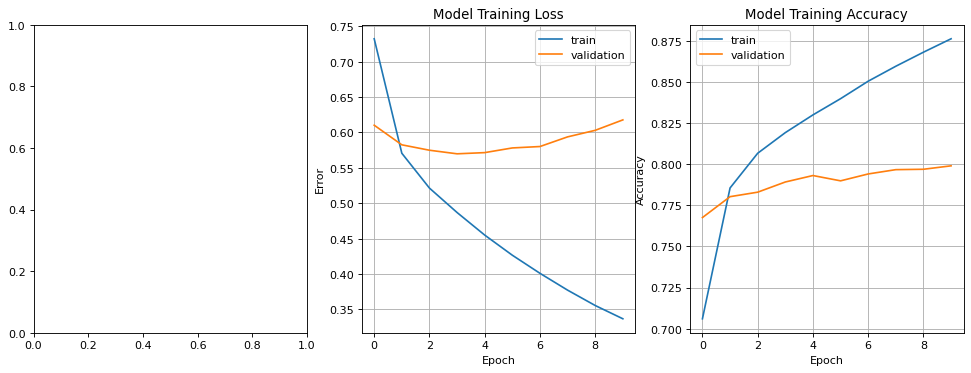

In [21]:
# Define the function to calculate the specificity
# def spec(a, b):
#     return a / (a + b)

# Define a function to plot the sensitivity and specificity
# def plotBalance(h, name):
#     # Calculate the specificity
#     specificity = list(map(spec, h.history['true_negatives'], h.history['false_positives']))
#     val_specificity = list(map(spec, h.history['val_true_negatives'], h.history['val_false_positives']))

#     # Plot the recall curve
#     plt.plot(h.history['recall'], label='train recall')
#     plt.plot(h.history['val_recall'], label='validation recall')

#     # Plot the specificity curve
#     plt.plot(specificity, label='train specificity')
#     plt.plot(val_specificity, label='validation specificity')

#     # Define the graph
#     plt.title('{0} Training Sensitivity/Specificity'.format(name))
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)

# Define a function to plot the loss curve
def plotLoss(h, name):
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('{0} Training Loss'.format(name))
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

# Plot the Accuracy curve
def plotAccuracy(h, name):
    plt.plot(h.history['Accuracy'], label='train')
    plt.plot(h.history['val_Accuracy'], label='validation')
    plt.title('{0} Training Accuracy'.format(name))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

# Define the sub-plot size
nCols = 3
nRows = 1

# Prepare the Loss Plots
plt.figure(figsize=(nCols * 5, nRows * 5), dpi=80)

# Plot the Sensitivity/Specificity
plt.subplot(nRows, nCols, 1)
# plotBalance(history, 'Model')

# Plot the Loss
plt.subplot(nRows, nCols, 2)
plotLoss(history, 'Model')
    
# Plot the Accuracy
plt.subplot(nRows, nCols, 3)
plotAccuracy(history, 'Model')

# Draw the plots
plt.show()



## 8. Discussion and conclusions

Instructions: Write

- What settings and models were tested before the best model was found
    - What where the results of these experiments 
- Summary of  
    - What was your best model and its settings 
    - What was the final achieved performance 
- What are your main observations and learning points
- Discussion how the model could be improved in future 

**Note:** Remember to evaluate the final metrics using the test set. 
